# AC547 Personal Project—Cleaning GDP Data


## Step 1 – Load the raw MSA GDP CSV

In this step, I import the CSV file (`msa_gdp_to_dataspell.csv`) and do a quick first look at the structure.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("msa_gdp_to_dataspell.csv")

df.head()


,GeoFips,GeoName,LineCode,Description,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,12060,"Atlanta-Sandy Springs-Alpharetta, GA (Metropol...",1,Real GDP (thousands of chained 2017 dollars),318110620,327640035,342782600,360870172,380019119,398208502,413028711,429660232,416596291,444713055,461994504,471655708
1,12060,"Atlanta-Sandy Springs-Alpharetta, GA (Metropol...",3,Current-dollar GDP (thousands of current dollars),293952861,307672780,327672584,351859761,376240169,398208502,420534764,446655157,438872169,483528782,534307899,570662834
2,12580,"Baltimore-Columbia-Towson, MD (Metropolitan St...",1,Real GDP (thousands of chained 2017 dollars),177705452,181180869,184038314,187802711,194266369,198332437,200409767,201619144,194807422,204812340,210176525,213539532
3,12580,"Baltimore-Columbia-Towson, MD (Metropolitan St...",3,Current-dollar GDP (thousands of current dollars),162981268,168806696,174791079,182271120,191569591,198332437,204559676,210146753,207278076,225065634,243871881,259690214
4,14460,"Boston-Cambridge-Newton, MA-NH (Metropolitan S...",1,Real GDP (thousands of chained 2017 dollars),389780969,392768811,400960432,416982922,424191410,433844401,451335935,467414114,463272465,495860834,507807016,515386134


## Step 2 – Inspect data structure

Before cleaning, review the columns, datatypes, and overall layout using `df.info()` to confirm how the BEA GDP data is organized.


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   GeoFips      44 non-null     int64 
 1   GeoName      44 non-null     object
 2   LineCode     44 non-null     int64 
 3   Description  44 non-null     object
 4   2012         44 non-null     int64 
 5   2013         44 non-null     int64 
 6   2014         44 non-null     int64 
 7   2015         44 non-null     int64 
 8   2016         44 non-null     int64 
 9   2017         44 non-null     int64 
 10  2018         44 non-null     int64 
 11  2019         44 non-null     int64 
 12  2020         44 non-null     int64 
 13  2021         44 non-null     int64 
 14  2022         44 non-null     int64 
 15  2023         44 non-null     int64 
dtypes: int64(14), object(2)
memory usage: 5.6+ KB


## Step 3 – Understand LineCode and GDP types

Each MSA appears multiple times, with different `LineCode` values.
In this step, I check which `LineCode` values exist and how they map to the GDP description
(e.g., real GDP vs. current-dollar GDP).


In [3]:
# Check which LineCode / Description combinations exist
df[['LineCode', 'Description']].drop_duplicates().sort_values('LineCode')


,LineCode,Description
0,1,Real GDP (thousands of chained 2017 dollars)
1,3,Current-dollar GDP (thousands of current dollars)


## Step 4 – Reshape from wide format to long format

The dataset currently stores each year (2012–2023) as its own column, which is not ideal for analysis.
In this step, I convert the data into a long format using `pd.melt()`, creating:

- `Year`: the year of the GDP value
- `Value`: the GDP amount


In [4]:
# Columns that represent years
year_cols = [str(col) for col in df.columns if col.isdigit()]

# Melt into a long format
df_long = df.melt(
    id_vars=['GeoFips', 'GeoName', 'LineCode', 'Description'],
    value_vars=year_cols,
    var_name='Year',
    value_name='Value'
)

df_long.head()


,GeoFips,GeoName,LineCode,Description,Year,Value
0,12060,"Atlanta-Sandy Springs-Alpharetta, GA (Metropol...",1,Real GDP (thousands of chained 2017 dollars),2012,318110620
1,12060,"Atlanta-Sandy Springs-Alpharetta, GA (Metropol...",3,Current-dollar GDP (thousands of current dollars),2012,293952861
2,12580,"Baltimore-Columbia-Towson, MD (Metropolitan St...",1,Real GDP (thousands of chained 2017 dollars),2012,177705452
3,12580,"Baltimore-Columbia-Towson, MD (Metropolitan St...",3,Current-dollar GDP (thousands of current dollars),2012,162981268
4,14460,"Boston-Cambridge-Newton, MA-NH (Metropolitan S...",1,Real GDP (thousands of chained 2017 dollars),2012,389780969


## Step 5 – Pivot LineCode into RealGDP and CurrentGDP

Now that the data is in long format, each row corresponds to a single
(MSA, LineCode, Year) GDP value. To make the dataset easier to analyze,
I pivot the LineCode values into separate columns:

- `1` → `RealGDP`
- `3` → `CurrentGDP`

Each final row will represent one MSA in one Year, with both GDP types as columns.


In [5]:
# Pivot LineCode values into separate GDP columns
df_pivot = df_long.pivot_table(
    index=['GeoFips', 'GeoName', 'Year'],
    columns='LineCode',
    values='Value'
).reset_index()

# Rename LineCode columns for clarity
df_pivot = df_pivot.rename(columns={
    1: 'RealGDP',
    3: 'CurrentGDP'
})

df_pivot.head()


LineCode,GeoFips,GeoName,Year,RealGDP,CurrentGDP
0,12060,"Atlanta-Sandy Springs-Alpharetta, GA (Metropol...",2012,318110620.0,293952861.0
1,12060,"Atlanta-Sandy Springs-Alpharetta, GA (Metropol...",2013,327640035.0,307672780.0
2,12060,"Atlanta-Sandy Springs-Alpharetta, GA (Metropol...",2014,342782600.0,327672584.0
3,12060,"Atlanta-Sandy Springs-Alpharetta, GA (Metropol...",2015,360870172.0,351859761.0
4,12060,"Atlanta-Sandy Springs-Alpharetta, GA (Metropol...",2016,380019119.0,376240169.0


## Step 6 – Final cleaning (Year datatype, sorting)

To prepare the dataset for analysis, I:
- Convert the `Year` column to integer
- Sort rows logically by MSA and Year
- Verify there are no missing GDP values


In [6]:
# Convert Year from string to integer
df_pivot['Year'] = df_pivot['Year'].astype(int)

# Sort rows for readability
df_clean = df_pivot.sort_values(['GeoName', 'Year']).reset_index(drop=True)

df_clean.head()


LineCode,GeoFips,GeoName,Year,RealGDP,CurrentGDP
0,12060,"Atlanta-Sandy Springs-Alpharetta, GA (Metropol...",2012,318110620.0,293952861.0
1,12060,"Atlanta-Sandy Springs-Alpharetta, GA (Metropol...",2013,327640035.0,307672780.0
2,12060,"Atlanta-Sandy Springs-Alpharetta, GA (Metropol...",2014,342782600.0,327672584.0
3,12060,"Atlanta-Sandy Springs-Alpharetta, GA (Metropol...",2015,360870172.0,351859761.0
4,12060,"Atlanta-Sandy Springs-Alpharetta, GA (Metropol...",2016,380019119.0,376240169.0


## Step 7 – Standardize MSA Names (GeoName cleanup)

In this step, I standardize the GeoName field to make the dataset consistent with the naming conventions used by the rest of the project team.


In [7]:
# Standardize MSA names

df_clean["GeoName"] = (
    df_clean["GeoName"]
        .str.split("-").str[0]
        .str.split(",").str[0]
        .str.strip()
)

# Special overrides
df_clean.loc[df_clean["GeoName"].str.contains("New York"), "GeoName"] = "New York"
df_clean.loc[df_clean["GeoName"].str.contains("Dallas"), "GeoName"] = "DFW"
df_clean.loc[df_clean["GeoName"].str.contains("Washington"), "GeoName"] = "WashingtonDC"
df_clean.loc[df_clean["GeoName"].str.contains("Urban Honolulu"), "GeoName"] = "Honolulu"



## Step 8 - Drop GeoFips Column and Honolulu MSA


In [8]:
# Drop GeoFips column (not needed for analysis)
df_clean = df_clean.drop(columns=['GeoFips'])
# Drop Honolulu from the dataset
df_clean = df_clean[df_clean['GeoName'] != 'Honolulu']



## Step 9 – Save cleaned dataset

Export the cleaned and analysis-ready dataframe to a CSV file.


In [48]:
df_clean.to_csv("msa_gdp_clean.csv", index=False)


## Chart - GDP data


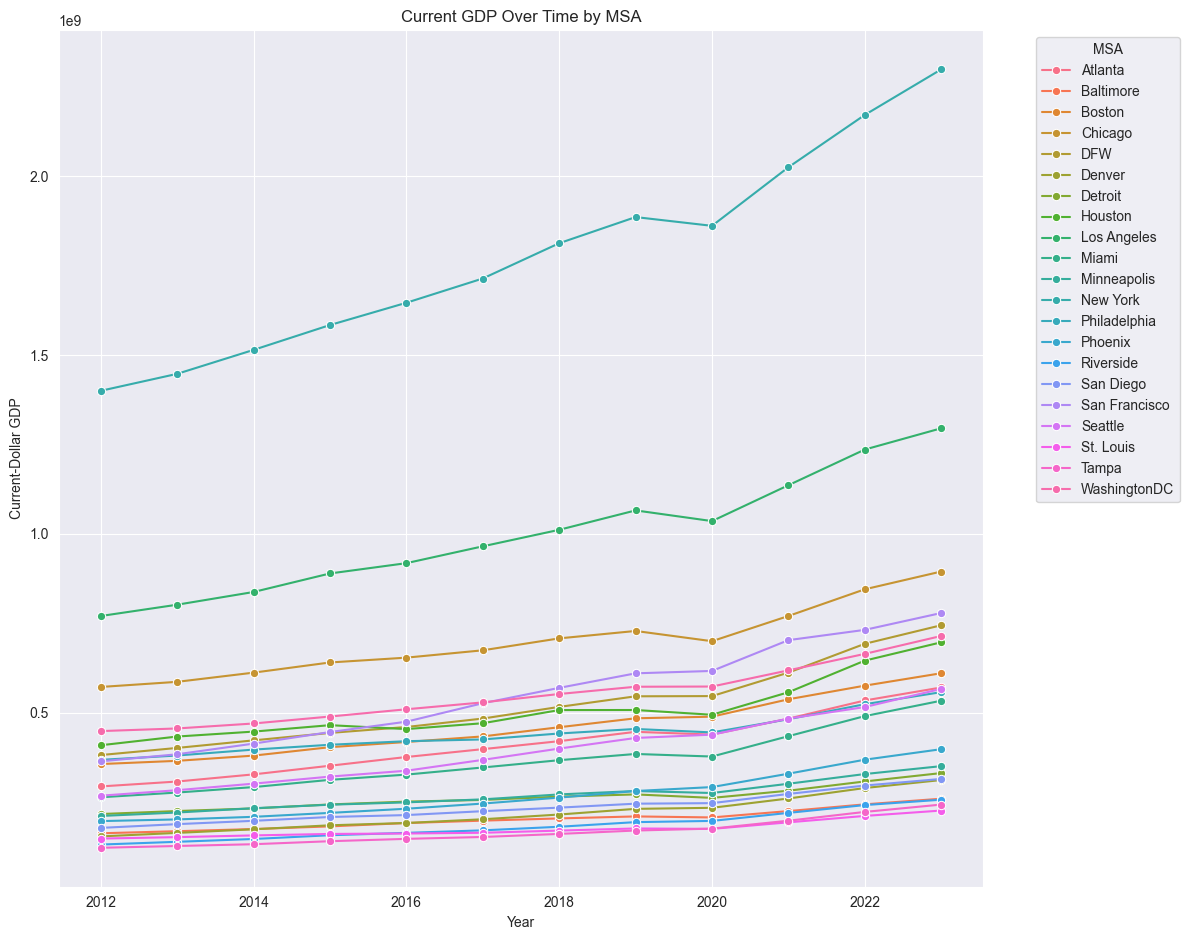

In [14]:
# Make sure seaborn uses a distinct color palette automatically
sns.set_palette("tab10")  # you can change to "tab20" if you have many MSAs

plt.figure(figsize=(12, 9.5))

sns.lineplot(
    data=df_clean,
    x="Year",
    y="CurrentGDP",
    hue="GeoName",
    marker="o"
)

plt.title("Current GDP Over Time by MSA")
plt.xlabel("Year")
plt.ylabel("Current-Dollar GDP")
plt.legend(title="MSA", bbox_to_anchor=(1.05, 1), loc="upper left")  # moves legend outside
plt.tight_layout()
plt.show()